In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **데이터 전처리**

In [ ]:
# TA-Lib 라이브러리를 다운로드하고 설치하는 작업을 수행
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4685    0  4685    0     0  12107      0 --:--:-- --:--:-- --:--:-- 12137
100  517k  100  517k    0     0   600k      0 --:--:-- --:--:-- --:--:-- 3693k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4737    0  4737    0     0  10690      0 --:--:-- --:--:-- --:--:-- 10693
100  392k  100  392k    0     0   479k      0 --:--:-- --:--:-- --:--:-- 1973k


In [ ]:
%cd /content/drive/Othercomputers/내 컴퓨터/BXAI/캡스톤/trending

/content/drive/Othercomputers/내 컴퓨터/BXAI/캡스톤/trending


In [ ]:
import talib
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

from FNC_02_Preprocessing import FNC_02_Preprocessing
from FNC_Func_Extrema import FNC_Func_Extrema
from FNC_Func_PST import FNC_Func_PST

import matplotlib.pyplot as plt

In [ ]:
%cd /content/drive/MyDrive/CodeData/Data

/content/drive/MyDrive/CodeData/Data


In [ ]:
#KR7005930003.csv에서 필요로하는 열만 추출
dfdf = pd.read_csv('KR7005930003.csv')
#dfdf = dfdf[['TRD_DD', 'ISU_CD', 'ISU_NM', 'TDD_CLSPRC', 'TDD_OPNPRC', 'TDD_HGPRC',
       #'TDD_LWPRC', 'MKTCAP', 'ACC_TRDVOL']]
dfdf

,TRD_DD,ISU_CD,ISU_NM,TDD_CLSPRC,TDD_OPNPRC,TDD_HGPRC,TDD_LWPRC,MKTCAP,ACC_TRDVOL,EPS,PER,BPS,PBR,DPS,DVD_YLD
0,2022/01/11,5930,삼성전자,"78,900","78,400","79,000","78,000","471,015,843,195,000","13,221,123","3,841",20.54,"39,406",2.00,"2,994",3.79
1,2022/01/10,5930,삼성전자,"78,000","78,100","78,100","77,100","465,643,038,900,000","9,947,422","3,841",20.31,"39,406",1.98,"2,994",3.84
2,2022/01/07,5930,삼성전자,"78,300","78,100","78,400","77,400","467,433,973,665,000","15,163,757","3,841",20.39,"39,406",1.99,"2,994",3.82
3,2022/01/06,5930,삼성전자,"76,900","76,700","77,600","76,600","459,076,278,095,000","12,931,954","3,841",20.02,"39,406",1.95,"2,994",3.89
4,2022/01/05,5930,삼성전자,"77,400","78,800","79,000","76,400","462,061,169,370,000","25,470,640","3,841",20.15,"39,406",1.96,"2,994",3.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,1995/05/08,5930,삼성전자,"121,000","122,000","122,000","120,500","6,578,606,045,000","91,810",-,-,-,-,-,-
6758,1995/05/06,5930,삼성전자,"122,000","122,000","123,500","122,000","6,632,974,690,000","47,440",-,-,-,-,-,-
6759,1995/05/04,5930,삼성전자,"122,500","124,000","124,500","122,000","6,660,159,012,500","175,590",-,-,-,-,-,-
6760,1995/05/03,5930,삼성전자,"123,500","119,500","126,500","119,500","6,714,527,657,500","382,980",-,-,-,-,-,-


In [ ]:
#데이터 타입이 'object'이고 'TRD_DD'와 'ISU_NM'이 아닌 열은 ,를 제거 후 부동 float 타입으로 변환
dfdf = dfdf.iloc[:]

for column in dfdf.columns:
    if dfdf[column].dtype == 'object' and column not in ['TRD_DD', 'ISU_NM']:
        try:
            dfdf[column] = dfdf[column].str.replace(',', '').astype('float')
        except ValueError as e:
            print(f" {column}: {e}")
    elif column not in ['TRD_DD', 'ISU_NM']:
        dfdf[column] = dfdf[column].astype('float')

dfdf

 EPS: could not convert string to float: '-'
 PER: could not convert string to float: '-'
 BPS: could not convert string to float: '-'
 PBR: could not convert string to float: '-'
 DPS: could not convert string to float: '-'
 DVD_YLD: could not convert string to float: '-'


,TRD_DD,ISU_CD,ISU_NM,TDD_CLSPRC,TDD_OPNPRC,TDD_HGPRC,TDD_LWPRC,MKTCAP,ACC_TRDVOL,EPS,PER,BPS,PBR,DPS,DVD_YLD
0,2022/01/11,5930.0,삼성전자,78900.0,78400.0,79000.0,78000.0,4.710158e+14,13221123.0,"3,841",20.54,"39,406",2.00,"2,994",3.79
1,2022/01/10,5930.0,삼성전자,78000.0,78100.0,78100.0,77100.0,4.656430e+14,9947422.0,"3,841",20.31,"39,406",1.98,"2,994",3.84
2,2022/01/07,5930.0,삼성전자,78300.0,78100.0,78400.0,77400.0,4.674340e+14,15163757.0,"3,841",20.39,"39,406",1.99,"2,994",3.82
3,2022/01/06,5930.0,삼성전자,76900.0,76700.0,77600.0,76600.0,4.590763e+14,12931954.0,"3,841",20.02,"39,406",1.95,"2,994",3.89
4,2022/01/05,5930.0,삼성전자,77400.0,78800.0,79000.0,76400.0,4.620612e+14,25470640.0,"3,841",20.15,"39,406",1.96,"2,994",3.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,1995/05/08,5930.0,삼성전자,121000.0,122000.0,122000.0,120500.0,6.578606e+12,91810.0,-,-,-,-,-,-
6758,1995/05/06,5930.0,삼성전자,122000.0,122000.0,123500.0,122000.0,6.632975e+12,47440.0,-,-,-,-,-,-
6759,1995/05/04,5930.0,삼성전자,122500.0,124000.0,124500.0,122000.0,6.660159e+12,175590.0,-,-,-,-,-,-
6760,1995/05/03,5930.0,삼성전자,123500.0,119500.0,126500.0,119500.0,6.714528e+12,382980.0,-,-,-,-,-,-


In [ ]:
dfdf['ISU_NM'][0]

'삼성전자'

In [ ]:
df =pd.concat([dfdf['TRD_DD'],dfdf['ISU_CD'],dfdf['ISU_NM'],dfdf['TDD_CLSPRC'],dfdf['TDD_OPNPRC'],dfdf['TDD_HGPRC'],dfdf['TDD_LWPRC'],dfdf['MKTCAP'],dfdf['ACC_TRDVOL']],axis=1)
df

,TRD_DD,ISU_CD,ISU_NM,TDD_CLSPRC,TDD_OPNPRC,TDD_HGPRC,TDD_LWPRC,MKTCAP,ACC_TRDVOL
0,2022/01/11,5930.0,삼성전자,78900.0,78400.0,79000.0,78000.0,4.710158e+14,13221123.0
1,2022/01/10,5930.0,삼성전자,78000.0,78100.0,78100.0,77100.0,4.656430e+14,9947422.0
2,2022/01/07,5930.0,삼성전자,78300.0,78100.0,78400.0,77400.0,4.674340e+14,15163757.0
3,2022/01/06,5930.0,삼성전자,76900.0,76700.0,77600.0,76600.0,4.590763e+14,12931954.0
4,2022/01/05,5930.0,삼성전자,77400.0,78800.0,79000.0,76400.0,4.620612e+14,25470640.0
...,...,...,...,...,...,...,...,...,...
6757,1995/05/08,5930.0,삼성전자,121000.0,122000.0,122000.0,120500.0,6.578606e+12,91810.0
6758,1995/05/06,5930.0,삼성전자,122000.0,122000.0,123500.0,122000.0,6.632975e+12,47440.0
6759,1995/05/04,5930.0,삼성전자,122500.0,124000.0,124500.0,122000.0,6.660159e+12,175590.0
6760,1995/05/03,5930.0,삼성전자,123500.0,119500.0,126500.0,119500.0,6.714528e+12,382980.0


In [ ]:
df = dfdf.sort_values(by=['TRD_DD'])
df.reset_index(drop=True,inplace=True)

#인풋 데이터 모양 맞춰주기(backtest에 들어갈 데이터 모양)
df_bt = df[['TRD_DD','TDD_OPNPRC','TDD_HGPRC','TDD_LWPRC','TDD_CLSPRC', 'ACC_TRDVOL', 'MKTCAP']].copy()
df_bt['TRD_DD'] = pd.to_datetime(df_bt['TRD_DD'])
df_bt.rename(columns={'TRD_DD':'Date', 'TDD_OPNPRC':'Open', 'TDD_HGPRC':'High','TDD_LWPRC':'Low','TDD_CLSPRC':'Close', 'ACC_TRDVOL':'Volume', 'MKTCAP':'Marketcap'}, inplace=True)
df_bt.set_index('Date',drop=True,inplace=True)

def bt_data(data_bt):
    check_dtype = data_bt.dtype == 'object'
    if (check_dtype):
        return data_bt.str.replace(',','').astype('float')
    else :
        return data_bt.astype('float')


df_bt['Open'] = bt_data(df_bt['Open'])
df_bt['High'] = bt_data(df_bt['High'])
df_bt['Low'] = bt_data(df_bt['Low'])
df_bt['Close'] = bt_data(df_bt['Close'])
df_bt['Volume'] = bt_data(df_bt['Volume'])
df_bt['Marketcap'] = bt_data(df_bt['Marketcap'])
df_bt

,Open,High,Low,Close,Volume,Marketcap
Date,,,,,,
1995-05-02,121000.0,121000.0,118500.0,119500.0,139560.0,6.497053e+12
1995-05-03,119500.0,126500.0,119500.0,123500.0,382980.0,6.714528e+12
1995-05-04,124000.0,124500.0,122000.0,122500.0,175590.0,6.660159e+12
1995-05-06,122000.0,123500.0,122000.0,122000.0,47440.0,6.632975e+12
1995-05-08,122000.0,122000.0,120500.0,121000.0,91810.0,6.578606e+12
...,...,...,...,...,...,...
2022-01-05,78800.0,79000.0,76400.0,77400.0,25470640.0,4.620612e+14
2022-01-06,76700.0,77600.0,76600.0,76900.0,12931954.0,4.590763e+14
2022-01-07,78100.0,78400.0,77400.0,78300.0,15163757.0,4.674340e+14


In [ ]:
pip install backtrader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.5/419.5 kB 6.3 MB/s eta 0:00:00


In [ ]:
pip install pygad

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.8/80.8 kB 1.7 MB/s eta 0:00:00


In [ ]:
import pygad
import backtrader
import pandas as pd
import talib

class Trading:
    def __init__(self, df):
        self.df = df.copy()
        self.initial_capital = 100000.0

    def rsi(self,ga_instance, solution, solution_idx ):
        period, rsi_low, rsi_high = solution
        self.df['rsi'] = talib.RSI(self.df['Marketcap'], timeperiod=int(period))
        self.df['signal'] = np.where(self.df['rsi'] < rsi_low, 1, np.where(self.df['rsi'] > rsi_high, -1, 0))
        return self.trade_logic()

    def sma_cross(self,ga_instance, solution, solution_idx):
        pfast, pslow = solution
        self.df['sma1'] = talib.SMA(self.df['Marketcap'], timeperiod=int(pfast))
        self.df['sma2'] = talib.SMA(self.df['Marketcap'], timeperiod=int(pslow))
        self.df['signal'] = np.where(self.df['sma1'] > self.df['sma2'], 1, -1)
        return self.trade_logic()

    def ema_cross(self, ga_instance, solution, solution_idx):
        pfast, pslow=solution
        self.df['ema1'] = talib.EMA(self.df['Marketcap'], timeperiod=int(pfast))
        self.df['ema2'] = talib.EMA(self.df['Marketcap'], timeperiod=int(pslow))
        self.df['signal'] = np.where(self.df['ema1'] > self.df['ema2'], 1, -1)
        return self.trade_logic()

    def roc(self,ga_instance, solution, solution_idx):
        period = solution
        self.df['roc'] = talib.ROC(self.df['Marketcap'], timeperiod=int(period))
        self.df['signal'] = np.where(self.df['roc'] > 0, 1, -1)
        return self.trade_logic()

    def stochastic(self,ga_instance, solution, solution_idx):
        period, d_period, overbought, oversold = solution

        k, d = talib.STOCH(self.df['High']*self.df['Marketcap']/self.df['Close'], self.df['Low']*self.df['Marketcap']/self.df['Close'], self.df['Marketcap'], fastk_period=int(period), slowk_period=int(d_period))
        self.df['signal'] = np.where(k < oversold, 1, np.where(k > overbought, -1, 0))
        return self.trade_logic()

    def trade_logic(self):
        shares = 0
        for i in range(1, len(self.df)):
            if self.df['signal'].iloc[i] == 1 and self.initial_capital > 0:
                if self.df['Marketcap'].iloc[i] <= self.initial_capital:
                    shares = self.initial_capital / self.df['Marketcap'].iloc[i]
                    self.initial_capital =0.0
            elif self.df['signal'].iloc[i] == -1 and shares > 0:
                self.initial_capital += shares * self.df['Marketcap'].iloc[i]
                shares = 0.0

        final_portfolio_value = self.initial_capital + shares * self.df['Marketcap'].iloc[-1]
        return_rate = (final_portfolio_value - self.initial_capital) / self.initial_capital

        return final_portfolio_value


In [ ]:
import talib
import numpy as np

class SHOW_SIGNAL:
    def __init__(self, df):
        self.df = df.copy()

    def rsi(self, period, rsi_low, rsi_high):
        self.df['rsi'] = talib.RSI(self.df['Marketcap'], timeperiod=int(period))
        self.df['signal'] = np.where(self.df['rsi'] < rsi_low, 1, np.where(self.df['rsi'] > rsi_high, -1, 0))
        return self.trade_logic()

    def sma_cross(self, pfast, pslow):
        self.df['sma1'] = talib.SMA(self.df['Marketcap'], timeperiod=int(pfast))
        self.df['sma2'] = talib.SMA(self.df['Marketcap'], timeperiod=int(pslow))
        self.df['signal'] = np.where(self.df['sma1'] > self.df['sma2'], 1, -1)
        return self.trade_logic()

    def ema_cross(self, pfast, pslow):
        self.df['ema1'] = talib.EMA(self.df['Marketcap'], timeperiod=int(pfast))
        self.df['ema2'] = talib.EMA(self.df['Marketcap'], timeperiod=int(pslow))
        self.df['signal'] = np.where(self.df['ema1'] > self.df['ema2'], 1, -1)
        return self.trade_logic()

    def roc(self, period):
        self.df['roc'] = talib.ROC(self.df['Marketcap'], timeperiod=int(period))
        self.df['signal'] = np.where(self.df['roc'] > 0, 1, -1)
        return self.trade_logic()

    def stochastic(self, period, d_period, overbought, oversold):
        k, d = talib.STOCH(self.df['High']*self.df['Marketcap']/self.df['Close'], self.df['Low']*self.df['Marketcap']/self.df['Close'], self.df['Marketcap'], fastk_period=int(period), slowk_period=int(d_period))
        self.df['signal'] = np.where(k < oversold, 1, np.where(k > overbought, -1, 0))
        return self.trade_logic()

    def trade_logic(self, initial_capital=100000.0):
        shares = 0
        for i in range(1, len(self.df)):
            if self.df['signal'].iloc[i] == 1 and initial_capital > 0:
                if self.df['Marketcap'].iloc[i] <= initial_capital:
                    shares = initial_capital / self.df['Marketcap'].iloc[i]
                    initial_capital =0.0
            elif self.df['signal'].iloc[i] == -1 and shares > 0:
                initial_capital += shares * self.df['Marketcap'].iloc[i]
                shares = 0.0

        final_portfolio_value = initial_capital + shares * self.df['Marketcap'].iloc[-1]
        return_rate = (final_portfolio_value - initial_capital) / initial_capital

        return return_rate

In [ ]:
def genetic(g_space,Trading,n_gen):
    ga_instance_rsi = pygad.GA(
        num_generations=3,
        num_parents_mating=10,
        fitness_func=Trading,  # RSI 전략의 적합도 함수
        sol_per_pop=100,
        num_genes=n_gen,
        gene_space=g_space,
        parent_selection_type="sss",
        keep_parents=2,
        crossover_type="single_point",
        mutation_type="random",
        mutation_percent_genes=10,
        mutation_num_genes=1
    )

    ga_instance_rsi.run()

    solution, solution_fitness, solution_idx = ga_instance_rsi.best_solution()
    return solution, solution_fitness
    print("Parameters of the best solution for RSI strategy: {solution}".format(solution=solution))
    print("Fitness value of the best solution for RSI strategy = {solution_fitness}".format(solution_fitness=solution_fitness))


In [ ]:
df_bt

,Open,High,Low,Close,Volume,Marketcap
Date,,,,,,
1995-05-02,121000.0,121000.0,118500.0,119500.0,139560.0,6.497053e+12
1995-05-03,119500.0,126500.0,119500.0,123500.0,382980.0,6.714528e+12
1995-05-04,124000.0,124500.0,122000.0,122500.0,175590.0,6.660159e+12
1995-05-06,122000.0,123500.0,122000.0,122000.0,47440.0,6.632975e+12
1995-05-08,122000.0,122000.0,120500.0,121000.0,91810.0,6.578606e+12
...,...,...,...,...,...,...
2022-01-05,78800.0,79000.0,76400.0,77400.0,25470640.0,4.620612e+14
2022-01-06,76700.0,77600.0,76600.0,76900.0,12931954.0,4.590763e+14
2022-01-07,78100.0,78400.0,77400.0,78300.0,15163757.0,4.674340e+14


In [ ]:
"rsi", "sma_cross", "roc", "ema_cross",

('rsi', 'sma_cross', 'roc', 'ema_cross')

In [ ]:
def get_signals(df):
    trading = Trading(df)

    strategies = {
        "rsi": {"period": 14, "rsi_low": 30, "rsi_high": 70},
        "sma_cross": {"pfast": 20, "pslow": 60},
        "ema_cross": {"pfast": 20, "pslow": 60},
        "roc": {"period": 10},
        "stochastic": {"period": 14, "d_period": 3, "overbought": 70, "oversold": 30}
    }
    for i in ["rsi", "sma_cross", "roc", "ema_cross", "stochastic"]:

        if i == "rsi":
            g_space = [range(2, 100), range(1, 100), range(1, 100)]
            rsi_sol, rsi_fitness = genetic(g_space, trading.rsi, 3)
            strategies['rsi'] = {"period": rsi_sol[0], "rsi_low": rsi_sol[1], "rsi_high": rsi_sol[2]}

        elif i ==  "sma_cross":
            g_space = [range(2, 100), range(2, 100)]
            sma_sol, sma_fitness = genetic(g_space, trading.sma_cross, 2)
            strategies['sma_cross'] = {"pfast": sma_sol[0], "pslow": sma_sol[1]}

        elif i == "roc":
            g_space = [range(2, 100)]
            roc_sol, roc_fitness = genetic(g_space, trading.roc, 1)
            strategies['roc'] = {"period": roc_sol[0]}

        elif i == "ema_cross":
            g_space = [range(2, 100), range(2, 100)]
            ema_sol, ema_fitness = genetic(g_space, trading.ema_cross,2)
            strategies['ema_cross'] = {"pfast": ema_sol[0], "pslow": ema_sol[1]}

        elif i == "stochastic":
            g_space = [range(2, 100),range(2, 100), range(2, 100), range(2, 100)]
            sto_sol, sto_fitness = genetic(g_space, trading.stochastic,4)
            strategies["stochastic"] = {"period": sto_sol[0], "d_period": sto_sol[1], "overbought": sto_sol[2], "oversold": sto_sol[3]}

    signal_dataframes = pd.DataFrame()
    show_sig = SHOW_SIGNAL(df)
    for name, params in strategies.items():
        show_sig.df = df.copy()
        getattr(show_sig, name)(**params)
        signal_dataframes[name] = show_sig.df[['signal']].copy()

    return signal_dataframes

signal_dataframes = get_signals(df_bt)

data = pd.DataFrame()
scaler = MinMaxScaler(feature_range=(0, 1))
result = scaler.fit_transform(np.array(df_bt['Marketcap']).reshape(-1,1))
data['A2'] = pd.DataFrame(result)

# PST 파라매터 설정
T=5  # time interval
P=0.05  # percentage
if data['A2'].size == 0 or len(data['A2']) <= 10:
    data['PST'] = []
    data['nPST'] = 0
else:
    data['PST'], data['nPST'] = FNC_Func_PST(T, P, data['A2'])

signal_dataframes = signal_dataframes.reset_index()
signal_dataframes['Trend'] =data['PST']

signal_dataframes

,Date,rsi,sma_cross,ema_cross,roc,stochastic,Trend
0,1995-05-02,0,-1,-1,-1,0,0.0
1,1995-05-03,0,-1,-1,-1,0,0.0
2,1995-05-04,0,-1,-1,-1,0,0.0
3,1995-05-06,0,-1,-1,-1,0,0.0
4,1995-05-08,0,-1,-1,-1,0,0.0
...,...,...,...,...,...,...,...
6757,2022-01-05,1,-1,1,1,0,0.0
6758,2022-01-06,1,-1,1,1,0,0.0
6759,2022-01-07,1,-1,1,1,0,0.0
6760,2022-01-10,1,-1,1,1,0,0.0


<Axes: >

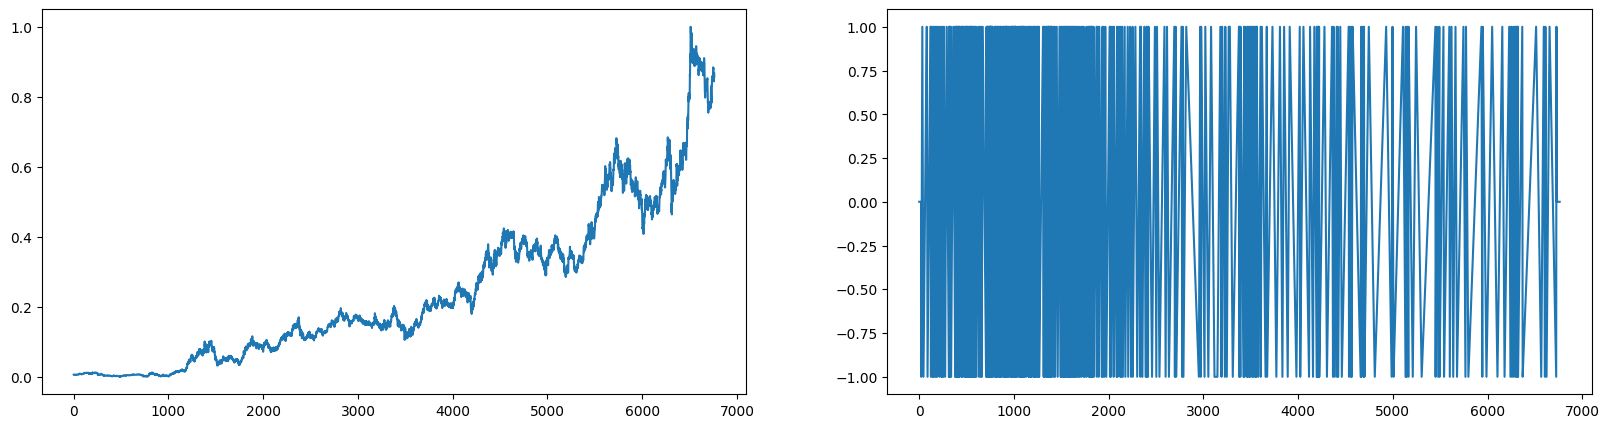

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
data['A2'].plot()
plt.subplot(1,2,2)
signal_dataframes['Trend'].plot()

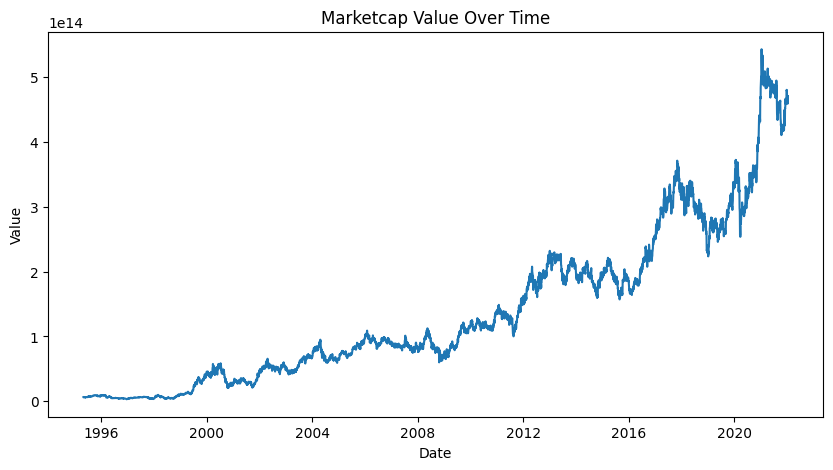

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df_bt['Marketcap'])
plt.title('Marketcap Value Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [ ]:
df_bt.reset_index(drop=True)

,Open,High,Low,Close,Volume,Marketcap
0,121000.0,121000.0,118500.0,119500.0,139560.0,6.497053e+12
1,119500.0,126500.0,119500.0,123500.0,382980.0,6.714528e+12
2,124000.0,124500.0,122000.0,122500.0,175590.0,6.660159e+12
3,122000.0,123500.0,122000.0,122000.0,47440.0,6.632975e+12
4,122000.0,122000.0,120500.0,121000.0,91810.0,6.578606e+12
...,...,...,...,...,...,...
6757,78800.0,79000.0,76400.0,77400.0,25470640.0,4.620612e+14
6758,76700.0,77600.0,76600.0,76900.0,12931954.0,4.590763e+14
6759,78100.0,78400.0,77400.0,78300.0,15163757.0,4.674340e+14
6760,78100.0,78100.0,77100.0,78000.0,9947422.0,4.656430e+14


In [ ]:
signal_dataframe = signal_dataframes.copy()
signal_dataframe

,Date,rsi,sma_cross,ema_cross,roc,stochastic,Trend
0,1995-05-02,0,-1,-1,-1,0,0.0
1,1995-05-03,0,-1,-1,-1,0,0.0
2,1995-05-04,0,-1,-1,-1,0,0.0
3,1995-05-06,0,-1,-1,-1,0,0.0
4,1995-05-08,0,-1,-1,-1,0,0.0
...,...,...,...,...,...,...,...
6757,2022-01-05,1,-1,1,1,0,0.0
6758,2022-01-06,1,-1,1,1,0,0.0
6759,2022-01-07,1,-1,1,1,0,0.0
6760,2022-01-10,1,-1,1,1,0,0.0


In [ ]:
df_bb = df_bt.reset_index(drop=True)
df_bb["Close"]

0       119500.0
1       123500.0
2       122500.0
3       122000.0
4       121000.0
          ...   
6757     77400.0
6758     76900.0
6759     78300.0
6760     78000.0
6761     78900.0
Name: Close, Length: 6762, dtype: float64

In [ ]:
# dfdf["TDD_CLSPRC"]의 행 순서를 반대로 합니다.
rdf = df_bb['Close']

signal_dataframes = pd.concat([signal_dataframe,rdf], axis=1)

In [ ]:
signal_dataframes = pd.concat([signal_dataframes, df_bb['Marketcap']],axis=1)

In [ ]:
signal_dataframes = signal_dataframes.rename(columns={'Close':'TDD_CLSPRC'})
signal_dataframes

,Date,rsi,sma_cross,ema_cross,roc,stochastic,Trend,TDD_CLSPRC,Marketcap
0,1995-05-02,0,-1,-1,-1,0,0.0,119500.0,6.497053e+12
1,1995-05-03,0,-1,-1,-1,0,0.0,123500.0,6.714528e+12
2,1995-05-04,0,-1,-1,-1,0,0.0,122500.0,6.660159e+12
3,1995-05-06,0,-1,-1,-1,0,0.0,122000.0,6.632975e+12
4,1995-05-08,0,-1,-1,-1,0,0.0,121000.0,6.578606e+12
...,...,...,...,...,...,...,...,...,...
6757,2022-01-05,1,-1,1,1,0,0.0,77400.0,4.620612e+14
6758,2022-01-06,1,-1,1,1,0,0.0,76900.0,4.590763e+14
6759,2022-01-07,1,-1,1,1,0,0.0,78300.0,4.674340e+14
6760,2022-01-10,1,-1,1,1,0,0.0,78000.0,4.656430e+14


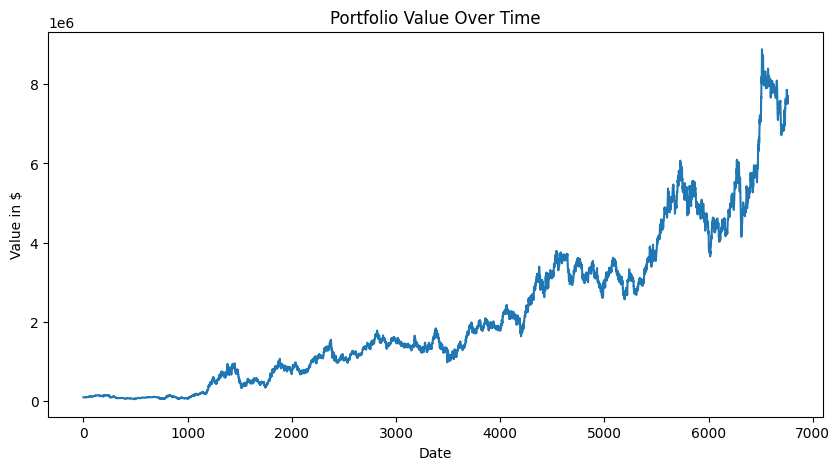

In [ ]:
def backtest(df):
    initial_capital = 100000.0  # 초기 자본
    shares = 0  # 주식 보유량

    # 매 거래일의 포트폴리오 가치를 추적할 리스트
    portfolio_values = []

    for _, row in df.iterrows():
        if row['rsi'] == 1 and initial_capital > 0:
            shares = initial_capital / row['Marketcap']  # 현재 자본으로 최대한 매수
            initial_capital = 0.0 # 현금은 0이 됩니다.

        elif row['rsi'] == -1 and shares > 0:
            initial_capital = shares * row['Marketcap']  # 모든 주식을 판매하고 현금을 얻습니다.
            shares = 0.0  # 주식은 0이 됩니다.

        # 매 거래일의 포트폴리오 가치 계산 (현금 + 주식 가치)
        portfolio_value = initial_capital + shares * row['Marketcap']
        portfolio_values.append(portfolio_value)

    df['Portfolio_Value'] = portfolio_values
    return df

sd = backtest(signal_dataframes)

# 그래프로 그리기
plt.figure(figsize=(10,5))
plt.plot(sd['Portfolio_Value'])
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Value in $')
plt.show()

In [ ]:
rsi_per = sd['Portfolio_Value'].iloc[-1]/sd['Portfolio_Value'][0]*100

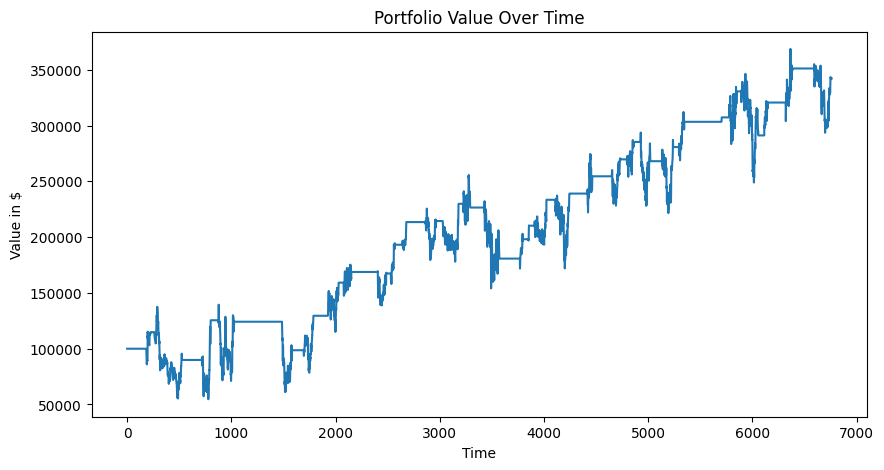

In [ ]:
def backtest(df):
    initial_capital = 100000.0  # 초기 자본
    shares = 0  # 주식 보유량

    # 매 거래일의 포트폴리오 가치를 추적할 리스트
    portfolio_values = []

    for _, row in df.iterrows():
        if row['sma_cross'] ==1 and initial_capital > 0:
            shares = initial_capital / row['Marketcap']  # 현재 자본으로 최대한 매수
            initial_capital = 0.0  # 현금은 0이 됩니다.

        elif row['sma_cross'] == -1 and shares > 0:
            initial_capital = shares * row['Marketcap']  # 모든 주식을 판매하고 현금을 얻습니다.
            shares = 0.0  # 주식은 0이 됩니다.

        # 매 거래일의 포트폴리오 가치 계산 (현금 + 주식 가치)
        portfolio_value = initial_capital + shares * row['Marketcap']
        portfolio_values.append(portfolio_value)

    df['Portfolio_Value'] = portfolio_values
    return df

sd = backtest(signal_dataframes)

# 그래프로 그리기
plt.figure(figsize=(10,5))
plt.plot(sd['Portfolio_Value'])
plt.title('Portfolio Value Over Time')
plt.xlabel('Time')
plt.ylabel('Value in $')
plt.show()

In [ ]:
sma_per = sd['Portfolio_Value'].iloc[-1]/sd['Portfolio_Value'][0]*100

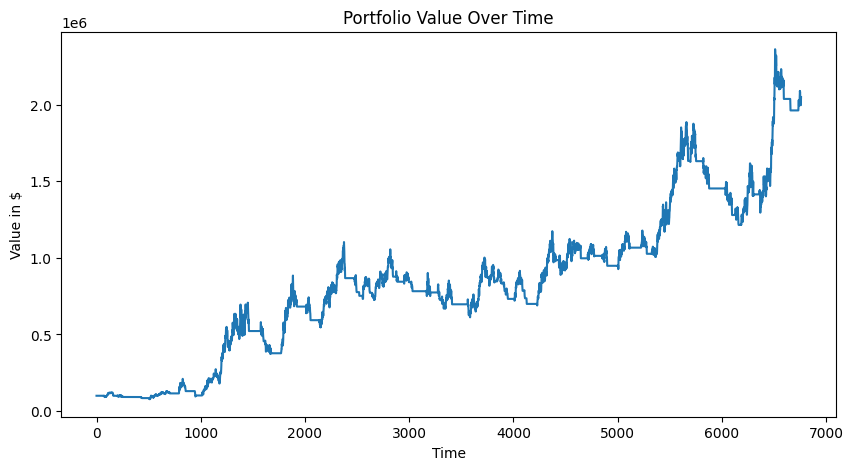

In [ ]:
def backtest(df):
    initial_capital = 100000.0  # 초기 자본
    shares = 0  # 주식 보유량

    # 매 거래일의 포트폴리오 가치를 추적할 리스트
    portfolio_values = []

    for _, row in df.iterrows():
        if row['ema_cross'] == 1 and initial_capital > 0:
            shares = initial_capital / row['Marketcap']  # 현재 자본으로 최대한 매수
            initial_capital = 0
        elif row['ema_cross'] == -1 and shares > 0:
            initial_capital = shares * row['Marketcap']  # 모든 주식을 판매하고 현금을 얻습니다.
            shares = 0.0  # 주식은 0이 됩니다.

        # 매 거래일의 포트폴리오 가치 계산 (현금 + 주식 가치)
        portfolio_value = initial_capital + shares * row['Marketcap']
        portfolio_values.append(portfolio_value)

    df['Portfolio_Value'] = portfolio_values
    return df

sd = backtest(signal_dataframes)

# 그래프로 그리기
plt.figure(figsize=(10,5))
plt.plot(sd['Portfolio_Value'])
plt.title('Portfolio Value Over Time')
plt.xlabel('Time')
plt.ylabel('Value in $')
plt.show()

In [ ]:
ema_per = sd['Portfolio_Value'].iloc[-1]/sd['Portfolio_Value'][0]*100

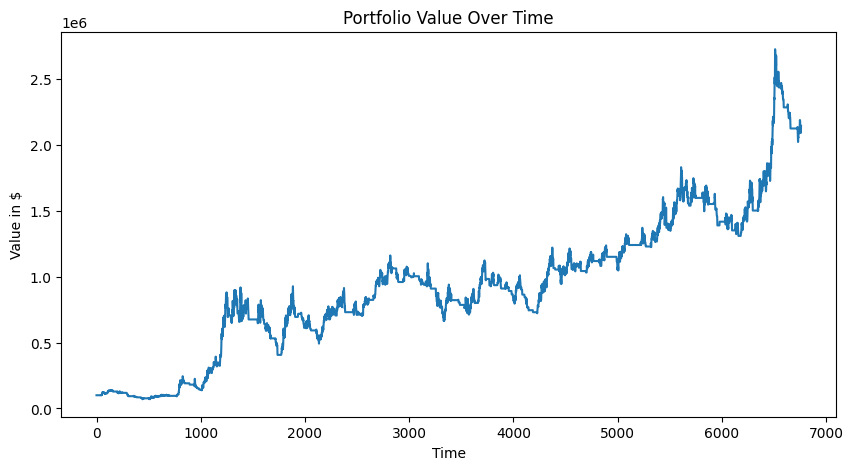

In [ ]:
def backtest(df):
    initial_capital = 100000.0  # 초기 자본
    shares = 0  # 주식 보유량

    # 매 거래일의 포트폴리오 가치를 추적할 리스트
    portfolio_values = []

    for _, row in df.iterrows():
        if row['roc'] == 1 and initial_capital > 0:
            shares = initial_capital / row['Marketcap']  # 현재 자본으로 최대한 매수
            initial_capital = 0

        elif row['roc'] == -1 and shares > 0:
            initial_capital = shares * row['Marketcap']  # 모든 주식을 판매하고 현금을 얻습니다.
            shares = 0.0  # 주식은 0이 됩니다.

        # 매 거래일의 포트폴리오 가치 계산 (현금 + 주식 가치)
        portfolio_value = initial_capital + shares * row['Marketcap']
        portfolio_values.append(portfolio_value)

    df['Portfolio_Value'] = portfolio_values
    return df

sd = backtest(signal_dataframes)

# 그래프로 그리기
plt.figure(figsize=(10,5))
plt.plot(sd['Portfolio_Value'])
plt.title('Portfolio Value Over Time')
plt.xlabel('Time')
plt.ylabel('Value in $')
plt.show()

In [ ]:
roc_per = sd['Portfolio_Value'].iloc[-1]/sd['Portfolio_Value'][0]*100

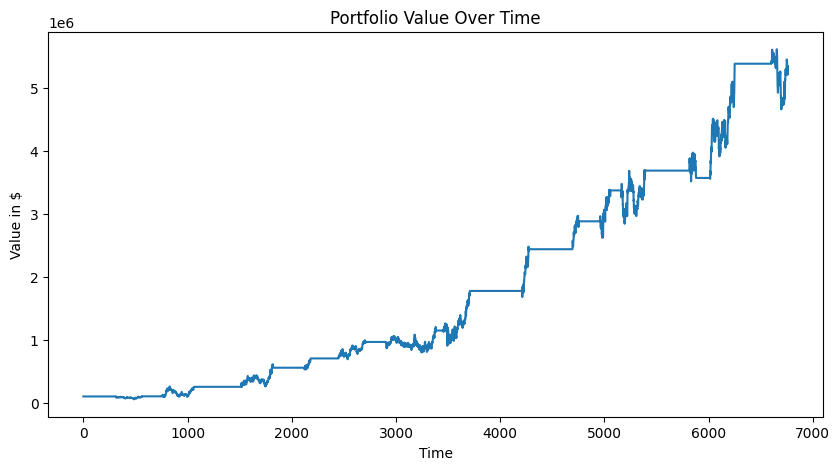

In [ ]:
def backtest(df):
    initial_capital = 100000.0  # 초기 자본
    shares = 0  # 주식 보유량

    # 매 거래일의 포트폴리오 가치를 추적할 리스트
    portfolio_values = []

    for _, row in df.iterrows():
        if row['stochastic'] == 1 and initial_capital > 0:
            shares = initial_capital / row['Marketcap']  # 현재 자본으로 최대한 매수
            initial_capital = 0

        elif row['stochastic'] == -1 and shares > 0:
            initial_capital = shares * row['Marketcap']  # 모든 주식을 판매하고 현금을 얻습니다.
            shares = 0.0  # 주식은 0이 됩니다.

        # 매 거래일의 포트폴리오 가치 계산 (현금 + 주식 가치)
        portfolio_value = initial_capital + shares * row['Marketcap']
        portfolio_values.append(portfolio_value)

    df['Portfolio_Value'] = portfolio_values
    return df

sd = backtest(signal_dataframes)

# 그래프로 그리기
plt.figure(figsize=(10,5))
plt.plot(sd['Portfolio_Value'])
plt.title('Portfolio Value Over Time')
plt.xlabel('Time')
plt.ylabel('Value in $')
plt.show()

In [ ]:
sto_per = sd['Portfolio_Value'].iloc[-1]/sd['Portfolio_Value'][0]*100

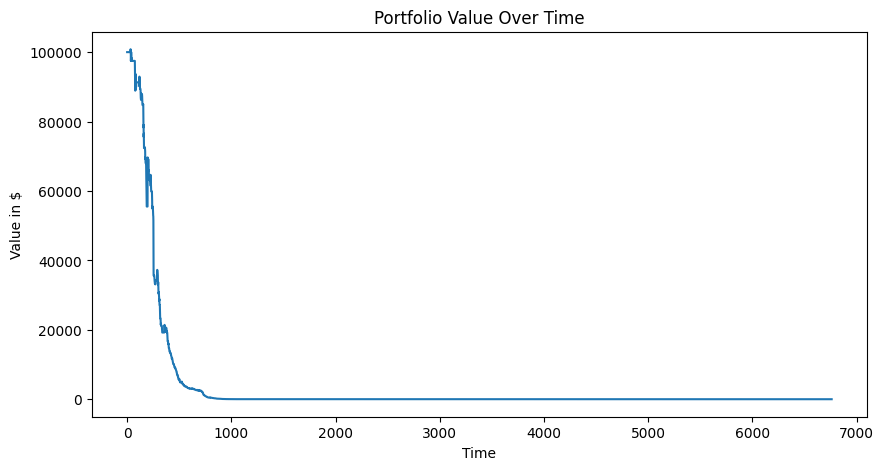

In [ ]:
def backtest(df):
    initial_capital = 100000.0  # 초기 자본
    shares = 0  # 주식 보유량

    # 매 거래일의 포트폴리오 가치를 추적할 리스트
    portfolio_values = []

    for _, row in df.iterrows():
        if row['Trend'] >= 0.7 and initial_capital > 0:
            shares = initial_capital / row['Marketcap']  # 현재 자본으로 최대한 매수
            initial_capital = 0

        elif row['Trend'] <= -0.7 and shares > 0:
            initial_capital = shares * row['Marketcap']  # 모든 주식을 판매하고 현금을 얻습니다.
            shares = 0.0  # 주식은 0이 됩니다.

        # 매 거래일의 포트폴리오 가치 계산 (현금 + 주식 가치)
        portfolio_value = initial_capital + shares * row['Marketcap']
        portfolio_values.append(portfolio_value)

    df['Portfolio_Value'] = portfolio_values
    return df

sd = backtest(signal_dataframes)

# 그래프로 그리기
plt.figure(figsize=(10,5))
plt.plot(sd['Portfolio_Value'])
plt.title('Portfolio Value Over Time')
plt.xlabel('Time')
plt.ylabel('Value in $')
plt.show()

In [ ]:
origin_per = df_bt['Marketcap'][-1]/df_bt['Marketcap'][0]*100
print("buy_and_hold : {:0.2f}%, rsi : {:0.2f}%, ema : {:0.2f}%, roc : {:0.2f}%, sto : {:0.2f}%".format(origin_per, rsi_per, ema_per, roc_per, sto_per))

buy_and_hold : 7249.68%, rsi : 7700.78%, ema : 2047.69%, roc : 2146.32%, sto : 5345.76%
